In [16]:
import pandas as pd  # For Data Manipulation
import numpy as np  # For Array Manipulation

import calendar  # For Month Manipulation

import matplotlib.pyplot as plt  # For Data Visualization
#import seaborn as sb  # For Data Visualization

In [17]:
music = pd.read_csv(r"C:\Users\pkare\Documents\Data Bootcamp\project-1\mxmh_survey_results.csv", encoding= "Latin-1")

In [18]:
music.sample(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
62,8/28/2022 13:34:00,15.0,Other streaming service,2.0,Yes,Yes,No,Rock,No,No,...,Never,Never,Very frequently,Sometimes,3.0,2.0,6.0,7.0,Improve,I understand.
256,8/29/2022 0:03:43,22.0,YouTube Music,1.0,Yes,No,No,Video game music,Yes,Yes,...,Never,Never,Rarely,Very frequently,3.0,3.0,0.0,7.0,No effect,I understand.
45,8/28/2022 12:12:35,17.0,I do not use a streaming service.,1.0,Yes,Yes,Yes,Folk,No,No,...,Rarely,Sometimes,Sometimes,Sometimes,7.0,3.0,1.0,5.0,Improve,I understand.
126,8/28/2022 17:15:27,18.0,Spotify,4.0,Yes,Yes,Yes,Pop,Yes,Yes,...,Rarely,Rarely,Very frequently,Very frequently,4.0,5.0,6.0,5.0,Improve,I understand.
496,9/1/2022 21:24:34,14.0,Spotify,7.0,Yes,No,No,Lofi,Yes,Yes,...,Never,Sometimes,Never,Rarely,3.0,2.0,8.0,0.0,Improve,I understand.


In [19]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [20]:
music = music.dropna(axis= 0)
music['Mental Health'] = music['Anxiety'] + music['Depression'] + music['Insomnia'] + music['OCD']
music.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Mental Health
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,26.0
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.,22.0
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,23.0
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.,30.0
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.,18.0


In [21]:
cols = list(music.columns.values)
cols

['Timestamp',
 'Age',
 'Primary streaming service',
 'Hours per day',
 'While working',
 'Instrumentalist',
 'Composer',
 'Fav genre',
 'Exploratory',
 'Foreign languages',
 'BPM',
 'Frequency [Classical]',
 'Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [Hip hop]',
 'Frequency [Jazz]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]',
 'Frequency [Metal]',
 'Frequency [Pop]',
 'Frequency [R&B]',
 'Frequency [Rap]',
 'Frequency [Rock]',
 'Frequency [Video game music]',
 'Anxiety',
 'Depression',
 'Insomnia',
 'OCD',
 'Music effects',
 'Permissions',
 'Mental Health']

In [22]:
music['Fav genre'].unique()

array(['Video game music', 'Jazz', 'R&B', 'K pop', 'Rock', 'EDM',
       'Country', 'Hip hop', 'Rap', 'Pop', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel', 'Latin'], dtype=object)

In [23]:
fav_genre = music.groupby('Fav genre')

video_game = fav_genre.get_group('Video game music')
jazz = fav_genre.get_group('Jazz')
rnb = fav_genre.get_group('R&B')
k_pop = fav_genre.get_group('K pop')
rock = fav_genre.get_group('Rock')
edm = fav_genre.get_group('EDM')
country = fav_genre.get_group('Country')
hip_hop = fav_genre.get_group('Hip hop')
rap = fav_genre.get_group('Rap')
pop = fav_genre.get_group('Pop')
classical = fav_genre.get_group('Classical')
metal = fav_genre.get_group('Metal')
folk = fav_genre.get_group('Folk')
lofi = fav_genre.get_group('Lofi')
gospel = fav_genre.get_group('Gospel')
latin = fav_genre.get_group('Latin')

video_game.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Mental Health
count,36.000000,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.000000
mean,22.083333,3.173611,2.777790e+07,6.388889,4.694444,4.638889,2.666667,18.388889
std,7.431112,2.728042,1.666666e+08,2.258669,2.896495,3.381908,2.693908,7.224078
min,13.000000,0.000000,6.000000e+01,3.000000,0.000000,0.000000,0.000000,3.000000
25%,17.000000,1.000000,9.500000e+01,4.000000,2.000000,1.000000,0.000000,13.000000
50%,21.000000,2.000000,1.225000e+02,6.000000,5.000000,5.000000,2.000000,18.000000
75%,24.000000,4.000000,1.475000e+02,8.000000,7.000000,7.250000,4.000000,24.500000
max,43.000000,10.000000,1.000000e+09,10.000000,10.000000,10.000000,8.000000,34.000000


In [28]:
video_game_stat = video_game.describe().transpose()
jazz_stat = jazz.describe().transpose()
rnb_stat = rnb.describe().transpose()
k_pop_stat = k_pop.describe().transpose()
rock_stat = rock.describe().transpose()
edm_stat = edm.describe().transpose()
country_stat = country.describe().transpose()
hip_hop_stat = hip_hop.describe().transpose()
rap_stat = rap.describe().transpose()
pop_stat = pop.describe().transpose()
classical_stat = classical.describe().transpose()
metal_stat = metal.describe().transpose()
folk_stat = folk.describe().transpose()
lofi_stat = lofi.describe().transpose()
gospel_stat = gospel.describe().transpose()
latin_stat = latin.describe().transpose()
latin_stat

,count,mean,std,min,25%,50%,75%,max
Age,2.0,17.5,0.707107,17.0,17.25,17.5,17.75,18.0
Hours per day,2.0,8.5,4.949747,5.0,6.75,8.5,10.25,12.0
BPM,2.0,122.5,70.003571,73.0,97.75,122.5,147.25,172.0
Anxiety,2.0,5.0,7.071068,0.0,2.50,5.0,7.50,10.0
Depression,2.0,4.5,2.121320,3.0,3.75,4.5,5.25,6.0
Insomnia,2.0,4.5,6.363961,0.0,2.25,4.5,6.75,9.0
OCD,2.0,2.5,3.535534,0.0,1.25,2.5,3.75,5.0
Mental Health,2.0,16.5,0.707107,16.0,16.25,16.5,16.75,17.0


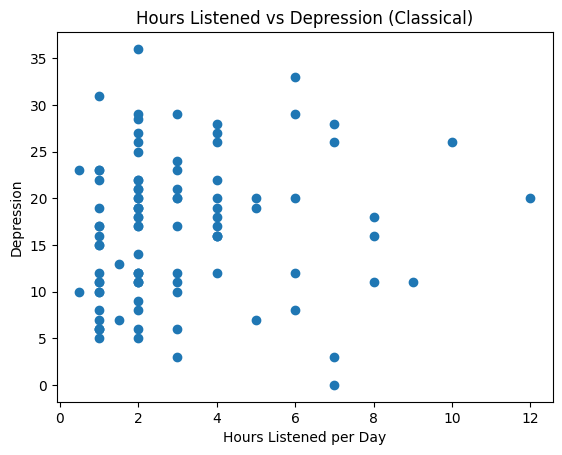

In [25]:
x = pop['Hours per day']
y = pop['Mental Health']
plt.scatter(x, y)
plt.xlabel("Hours Listened per Day")
plt.ylabel("Depression")
plt.title("Hours Listened vs Depression (Classical)")
plt.show()